In [35]:
from oceanograpy.data.ship_ctd_tools import _ctd_edit
from oceanograpy.data import ctd
import importlib as imp
imp.reload(_ctd_edit)

%matplotlib widget
D = ctd.ctds_from_cnv_dir('../example_data/cnv/atwain_cruise/')

Found 10 .cnv files in  "../example_data/cnv/atwain_cruise/".
Loaded 10 profiles from list of Datasets.
NOTE: It seems the input data already binned -> using preexisting binning.


Joining profiles together:   0%|          | 0/10 [00:00<?, ?it/s]

Output()

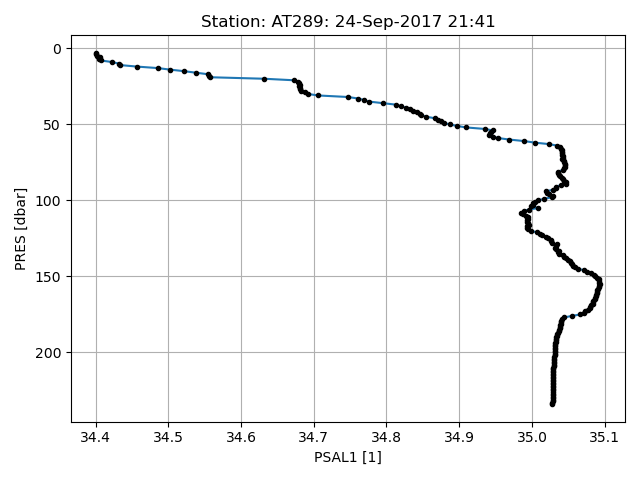

In [37]:
_ctd_edit.hand_remove_points(D, 'PSAL1', 'AT289')

In [38]:
D

<xarray.Dataset>
Dimensions:             (PRES: 871, TIME: 10)
Coordinates:
  * PRES                (PRES) float64 3.0 4.0 5.0 6.0 ... 871.0 872.0 873.0
  * TIME                (TIME) float64 1.743e+04 1.743e+04 ... 1.743e+04
Data variables:
    TEMP1               (TIME, PRES) float64 nan 0.6721 -0.3421 ... nan nan nan
    PTEMP1              (TIME, PRES) float64 nan 0.672 -0.3422 ... nan nan nan
    CNDC1               (TIME, PRES) float64 nan 28.13 27.35 ... nan nan nan
    PSAL1               (TIME, PRES) float64 nan 33.06 33.13 ... nan nan nan
    SIGTH1              (TIME, PRES) float64 nan 26.5 26.61 ... nan nan nan
    CHLA1_fluorescence  (TIME, PRES) float64 nan 1.597 1.749 ... nan nan nan
    SBE_FLAG            (TIME, PRES) float64 nan 0.0 0.0 0.0 ... nan nan nan nan
    STATION             (TIME) <U5 'AT280' 'AT281' 'AT282' ... 'AT288' 'AT289'
    LATITUDE            (TIME) float64 80.44 80.41 80.38 ... 80.04 80.03 80.02
    LONGITUDE           (TIME) float64 8.665 8.715 8.799 ... 10.75 10.9 11.0
    CRUISE              <U27 '!! CRUISE (Not assigned) !!'
Attributes:
    binned:          1 decibars (SBE software)
    history:         2017-09-24 to 2017-09-24: Data collection.\n2018-07-23: ...
    latitude:        80.0318
    longitude:       10.8973
    SBE_processing:  SBE SOFTWARE PROCESSING STEPS (extracted from .cnv file ...
    source_files:    E.g. AT288.HEX, AT288.XMLCON -> AT288.CNV
    featureType:     profile

In [269]:
#%matplotlib notebook

# Works with tkagg 
%matplotlib widget

Dowgrading (mamba install ipywidgets==7.7.5) did not work 


In [260]:
plt.close('all')

In [265]:
D

<xarray.Dataset>
Dimensions:             (PRES: 871, TIME: 10)
Coordinates:
  * PRES                (PRES) float64 3.0 4.0 5.0 6.0 ... 871.0 872.0 873.0
  * TIME                (TIME) float64 1.743e+04 1.743e+04 ... 1.743e+04
Data variables:
    TEMP1               (TIME, PRES) float64 nan 0.6721 -0.3421 ... nan nan nan
    PTEMP1              (TIME, PRES) float64 nan 0.672 -0.3422 ... nan nan nan
    CNDC1               (TIME, PRES) float64 nan 28.13 27.35 ... nan nan nan
    PSAL1               (TIME, PRES) float64 nan 33.06 33.13 ... nan nan nan
    SIGTH1              (TIME, PRES) float64 nan 26.5 26.61 ... nan nan nan
    CHLA1_fluorescence  (TIME, PRES) float64 nan 1.597 1.749 ... nan nan nan
    SBE_FLAG            (TIME, PRES) float64 nan 0.0 0.0 0.0 ... nan nan nan nan
    STATION             (TIME) <U5 'AT280' 'AT281' 'AT282' ... 'AT288' 'AT289'
    LATITUDE            (TIME) float64 80.44 80.41 80.38 ... 80.04 80.03 80.02
    LONGITUDE           (TIME) float64 8.665 8.715 8.799 ... 10.75 10.9 11.0
    CRUISE              <U27 '!! CRUISE (Not assigned) !!'
Attributes:
    binned:          1 decibars (SBE software)
    history:         2017-09-24 to 2017-09-24: Data collection.\n2018-07-23: ...
    latitude:        80.0318
    longitude:       10.8973
    SBE_processing:  SBE SOFTWARE PROCESSING STEPS (extracted from .cnv file ...
    source_files:    E.g. AT288.HEX, AT288.XMLCON -> AT288.CNV
    featureType:     profile

In [262]:
ctd.inspect_profiles(D)

In [202]:
station_index

2

In [245]:
D.STATION

<xarray.DataArray 'STATION' (TIME: 10)>
array(['AT280', 'AT281', 'AT282', 'AT283', 'AT284', 'AT285', 'AT286',
       'AT287', 'AT288', 'AT289'], dtype='<U5')
Coordinates:
  * TIME     (TIME) float64 1.743e+04 1.743e+04 ... 1.743e+04 1.743e+04
Attributes:
    long_name:  CTD station ID
    cf_role:    profile_id

In [231]:
from oceanograpy.util import time

Output()

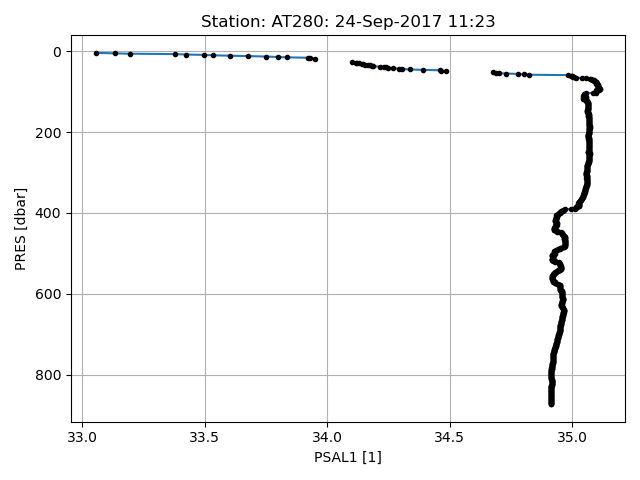

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
import ipywidgets as widgets
from IPython.display import display, clear_output

class hand_remove_points:
    def __init__(self, d, varnm, station):

        if station not in d.STATION:
            raise Exception(f'Invalid station ("{station}")')
        if varnm not in d.data_vars:
            raise Exception(f'Invalid variable ("{varnm}")')
        
        # Find the index where d.STATION == station
        self.station_index = (D['STATION'] == station).argmax(dim='TIME').item()
        
        self.varnm = varnm
        self.d = d
        self.var_data = d.isel(TIME=self.station_index)[varnm]
        self.PRES = d.PRES
        self.Npres = len(d.PRES) 
        
        self.fig, self.ax = plt.subplots()


        line, = self.ax.plot(self.var_data, self.PRES)
        point = self.ax.plot(self.var_data, self.PRES, '.k', zorder=3)
        picks = np.array([])
        xlims = self.ax.get_xlim()
        self.ax.set_xlim(xlims)
        self.ax.invert_yaxis()
        self.ax.set_xlabel(f'{varnm} [{self.d[varnm].units}]')
        self.ax.set_ylabel(f'PRES [{self.PRES.units}]')
        self.ax.grid()
        station_time_string = time.convert_timenum_to_datetime(self.d.TIME.values[self.station_index], d.TIME.units)
        self.fig.canvas.header_visible = False  # Hide the figure header
        self.ax.set_title(f'Station: {station}: {station_time_string}')
        plt.tight_layout()


        # Use interactive_output to create interactive controls
        self.es = RectangleSelector(self.ax, self.onselect, interactive=True)

        # Can maybe cut these 4 (use remove_bool instead)?
        self.var_points_remove = np.array([])
        self.var_points_selected = np.array([])
        self.PRES_points_selected = np.array([])
        self.PRES_points_remove = np.array([])
        self.remove_bool = np.bool_(np.zeros(self.Npres))

        
        self.temp_label = 'Points to remove'
        self.remove_label = 'Selected points to remove'

        # Add widget buttons
        self.button_apply_var = widgets.Button(description=f"Exit and apply to {varnm}")
        self.button_apply_var.on_click(self.exit_and_apply_var)
        self.button_apply_var.layout.width = '200px' 

        self.button_apply_all = widgets.Button(description=f"Exit and apply to all variables")
        self.button_apply_all.on_click(self.exit_and_apply_all)
        self.button_apply_all.layout.width = '200px' 
        
        self.button_exit_nochange = widgets.Button(description=f"Discard and exit")
        self.button_exit_nochange.on_click(self.exit_and_discard)
        self.button_exit_nochange.layout.width = '200px' 

        self.text_widget = widgets.HTML(value="Drag a rectangle to select points  ")
        
        self.button_remove = widgets.Button(description="Remove selected")
        self.button_remove.on_click(self.remove_selected)
        self.button_remove.style.button_color = '#FFB6C1'  # You can use any valid CSS color

        self.button_forget = widgets.Button(description="Forget selection")
        self.button_forget.on_click(self.forget_selection)
        self.button_forget.style.button_color = 'lightblue'  # You can use any valid CSS color

        self.button_restart = widgets.Button(description="Start over")
        self.button_restart.on_click(self.start_over_selection)
        self.button_restart.style.button_color = 'yellow'  # You can use any valid CSS color


        self.buttons_container_1 = widgets.HBox([self.button_apply_var, self.button_apply_all,
                                                self.button_exit_nochange])
        self.buttons_container_2 = widgets.HBox([
            self.text_widget, self.button_remove, self.button_forget, self.button_restart])

      #  display(widgets.VBox([self.buttons_container_1, self.buttons_container_2 ]))


        
        # Add an Output widget to capture the print statement
        self.output_widget = widgets.Output()

        self.widgets_all = widgets.VBox([self.buttons_container_1,  
                                         widgets.Output(), self.buttons_container_2,])

        # Display the widgets
        display(self.widgets_all)
        display(self.output_widget)

    
    def onselect(self, eclick, erelease):
        ext = self.es.extents
        rectangle = plt.Rectangle((ext[0], ext[2]), ext[1] - ext[0], ext[3] - ext[2])
        self.contains_TF_ = rectangle.contains_points(np.vstack([self.var_data, self.PRES]).T)
        self.ax.text(f'{len(self.contains_TF_)}', 34.5, 20, )

        self.var_points_selected = np.concatenate([self.var_points_selected, 
                                                self.var_data[self.contains_TF_]])
        self.PRES_points_selected = np.concatenate([self.PRES_points_selected, 
                                                self.PRES[self.contains_TF_]])
        try:
            self.temp_scatter.remove()
            plt.draw()
        except:
            pass
            
        plt.draw()
        self.temp_scatter = self.ax.scatter(self.var_points_selected, 
                        self.PRES_points_selected, color='b', label=self.temp_label)
        self.ax.legend()
        
    def remove_selected(self, button):

        self.var_points_remove = np.concatenate(
            [self.var_points_remove, self.var_points_selected])
        self.PRES_points_remove = np.concatenate(
            [self.PRES_points_remove, self.PRES_points_selected])

        try:
            self.remove_scatter.remove()
            plt.draw()
        except:
            pass
        
        self.remove_scatter = self.ax.scatter(self.var_points_remove, 
                        self.PRES_points_remove, color='r', 
                        label=self.remove_label, zorder=2)
        plt.draw()
        self.remove_label = None
        self.var_points_selected = np.array([])
        self.PRES_points_selected = np.array([])
       # self.var_data_return[self.contains_TF_] = np.nan
        self.remove_bool[self.contains_TF_] = True
        self.ax.legend()
    

    def forget_selection(self, button):
        try:
            self.temp_scatter.remove()
            plt.draw()
        except:
            pass
        self.PRES_points_selected = np.array([])
        self.var_points_selected = np.array([])


    def start_over_selection(self, button):
        try:
            self.temp_scatter.remove()
            plt.draw()
        except:
            pass
        self.var_points_remove = np.array([])
        self.var_points_selected = np.array([])
        self.PRES_points_selected = np.array([])
        self.PRES_points_remove = np.array([])
        self.remove_bool = np.bool_(np.zeros(self.Npres))
        try:
            self.remove_scatter.remove()
            plt.draw()
        except:
            pass

    
    def exit_and_apply_var(self, button):
        # Apply to this variable

        # Indexer used to access this specific profile
        time_loc = dict(TIME=self.d['TIME'].isel(TIME=self.station_index))
        # Set remove-flagged indices to NaN
        self.d[self.varnm].loc[time_loc] = np.where(self.remove_bool, 
                                    np.nan, self.d[self.varnm].loc[time_loc])
        
        # Count how many points we removed
        self.points_removed = np.sum(self.remove_bool)

        # Add info as a variable attribute
        if 'manual_editing' in self.d[self.varnm].attrs.keys(): 
            previous_edits = int(self.d[self.varnm].attrs['manual_editing'].split()[0])
            total_edits = previous_edits + self.points_removed
            self.d[self.varnm].attrs['manual_editing'] = (
               f'{total_edits} data points have been removed '
                'from this variable based on visual inspection.') 
        else:
            self.d[self.varnm].attrs['manual_editing'] = (
               f'{self.points_removed} data points have been ' 
                'removed from this variable based on visual inspection.') 

        
        with self.output_widget:
            clear_output(wait=True)
            print(f'APPLIED TO DATASET - Removed {self.points_removed} point(s)')

        
        self.close_everything()


    def exit_and_apply_all(self, button):
        self.close_everything()


    def exit_and_discard(self, button):
        self.close_everything()
        
        with self.output_widget:
            clear_output(wait=True)
           # print(f'APPLIED TO DATASET - Removed {self.points_removed} POINTS')
            print(f'EXITED WITHOUT CHANGING ANYTHING')

    def close_everything(self):
        fig = plt.gcf()
        fig.set_size_inches(0, 0)
        self.widgets_all.close()
        plt.close(fig)
            
# Create and show the plot
hand_remove_points(D, 'PSAL1', 'AT280');

In [256]:
D

<xarray.Dataset>
Dimensions:             (PRES: 871, TIME: 10)
Coordinates:
  * PRES                (PRES) float64 3.0 4.0 5.0 6.0 ... 871.0 872.0 873.0
  * TIME                (TIME) float64 1.743e+04 1.743e+04 ... 1.743e+04
Data variables:
    TEMP1               (TIME, PRES) float64 nan 0.6721 -0.3421 ... nan nan nan
    PTEMP1              (TIME, PRES) float64 nan 0.672 -0.3422 ... nan nan nan
    CNDC1               (TIME, PRES) float64 nan 28.13 27.35 ... nan nan nan
    PSAL1               (TIME, PRES) float64 nan 33.06 33.13 ... nan nan nan
    SIGTH1              (TIME, PRES) float64 nan 26.5 26.61 ... nan nan nan
    CHLA1_fluorescence  (TIME, PRES) float64 nan 1.597 1.749 ... nan nan nan
    SBE_FLAG            (TIME, PRES) float64 nan 0.0 0.0 0.0 ... nan nan nan nan
    STATION             (TIME) <U5 'AT280' 'AT281' 'AT282' ... 'AT288' 'AT289'
    LATITUDE            (TIME) float64 80.44 80.41 80.38 ... 80.04 80.03 80.02
    LONGITUDE           (TIME) float64 8.665 8.715 8.799 ... 10.75 10.9 11.0
    CRUISE              <U27 '!! CRUISE (Not assigned) !!'
Attributes:
    binned:          1 decibars (SBE software)
    history:         2017-09-24 to 2017-09-24: Data collection.\n2018-07-23: ...
    latitude:        80.0318
    longitude:       10.8973
    SBE_processing:  SBE SOFTWARE PROCESSING STEPS (extracted from .cnv file ...
    source_files:    E.g. AT288.HEX, AT288.XMLCON -> AT288.CNV
    featureType:     profile

In [163]:
from oceanograpy.data.ship_ctd_tools._ctd_visualize import _get_profile_variables

In [162]:


# Get the profile variables
def _get_profile_variables(d):
    '''
    Return a list of profile variables (i.e. variables with TIME, PRES dimensions)
    '''
    profile_variables = [varnm for varnm in d.data_vars if 'PRES' in d[varnm].dims 
                            and 'TIME' in d[varnm].dims]
    return profile_variables

In [161]:
D

<xarray.Dataset>
Dimensions:             (PRES: 871, TIME: 10)
Coordinates:
  * PRES                (PRES) float64 3.0 4.0 5.0 6.0 ... 871.0 872.0 873.0
  * TIME                (TIME) float64 1.743e+04 1.743e+04 ... 1.743e+04
Data variables:
    TEMP1               (TIME, PRES) float64 nan 0.6721 -0.3421 ... nan nan nan
    PTEMP1              (TIME, PRES) float64 nan 0.672 -0.3422 ... nan nan nan
    CNDC1               (TIME, PRES) float64 nan 28.13 27.35 ... nan nan nan
    PSAL1               (TIME, PRES) float64 nan 33.06 33.13 ... nan nan nan
    SIGTH1              (TIME, PRES) float64 nan 26.5 26.61 ... nan nan nan
    CHLA1_fluorescence  (TIME, PRES) float64 nan 1.597 1.749 ... nan nan nan
    SBE_FLAG            (TIME, PRES) float64 nan 0.0 0.0 0.0 ... nan nan nan nan
    STATION             (TIME) <U5 'AT280' 'AT281' 'AT282' ... 'AT288' 'AT289'
    LATITUDE            (TIME) float64 80.44 80.41 80.38 ... 80.04 80.03 80.02
    LONGITUDE           (TIME) float64 8.665 8.715 8.799 ... 10.75 10.9 11.0
    CRUISE              <U27 '!! CRUISE (Not assigned) !!'
Attributes:
    binned:          1 decibars (SBE software)
    history:         2017-09-24 to 2017-09-24: Data collection.\n2018-07-23: ...
    latitude:        80.0318
    longitude:       10.8973
    SBE_processing:  SBE SOFTWARE PROCESSING STEPS (extracted from .cnv file ...
    source_files:    E.g. AT288.HEX, AT288.XMLCON -> AT288.CNV
    featureType:     profile

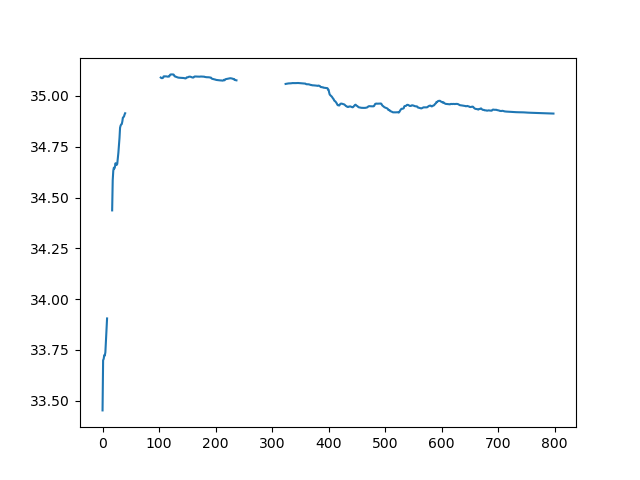

In [156]:
fig, ax = plt.subplots()
ax.plot(sel.d.PSAL1.isel(TIME=1))

In [159]:
D.attrs.keys()


dict_keys(['binned', 'history', 'latitude', 'longitude', 'SBE_processing', 'source_files', 'featureType'])